# Final Report: Happiness Determinants Analysis

**Author**: Jasper Sylvestre  
**Date**: November 24th, 2024

# I. Introduction

## 1.1 Research Objective

Using 2017 World Values Survey (WVS) and 2018 General Social Survey (GSS) data, this research's objective is to find the demographic, economic, social, and cultural predictors that are significantly related to self-reported happiness in the United States (U.S.) using machine learning methods such as Extreme Gradient Boosting (XGBoost) and post-modeling feature analysis.

## 1.2 Importance and Relevance

### 1.2.1 Summary of Key Findings

From this research

XXX

### 1.2.2 Significance and relevance

Achieving happiness is a universal human goal transcending time and culture. This research seeks to increase understanding of what key factors leads to happiness, allowing individuals and societies to increase our own happiness more optimally. By leveraging 2017 and 2018 survey data, this provides contemporary insights into happiness using a pre-pandemic baseline. We suspect this is more generalizable as a reliable foundation of normal societal conditions over waves of survey data with large-scale social distancing and other measures, such as the years from 2020 to 2022. Note survey data for years 2023 and 2024 are not completed as of this report, but they may have been chosen if they were available for increased reliability and timeliness.

To ensure an unbiased and comprehensive analysis, this research utilizes machine learning techniques, namely XGBoost to facilitate:

* Objective feature selection to identify significant predictors.
* Reduction of confirmation bias with data-driven insights outside of previous hypothesis
* Minimization of human error with automated learning processing.  

### 1.2.3 Potential applications and implications

Understanding different predictors for happiness has implications across various levels:

## 1.3 Future Research Directions

Future research could be informed using this research in several ways:

XXX

# II. Data Analysis

## 2.1 Data Sources

The primary data sources for this research are the corresponding waves of the:

* **WVS (2017)**: a globally recognized cross-national survey across various countries, including the U.S., covering topics such as values, beliefs, and attitudes of individuals.
* **GSS (2018)**: a comprehensive social survey that monitors changes over time in the U.S., covering topics such as social structure, institutions, and individual attitudes.

Both surveys cover similar topics, namely self-reported happiness and various potential predictors for happiness, such as gender, age, and income. The 2017 and 2018 wave provides a pre-pandemic baseline more relevant and generalizable under normal societal conditions. Both surveys have an established track record of providing reliable and valid high-quality datasets. Both surveys are freely available on their corresponding organization's website alongside thorough documentation and codebooks useful for understanding column names, survey answers, and survey methodology.

Due to the high levels of credibility and reliability to the survey data from both of these organizations, investigation conducted on these datasets will focus on understanding the data in order to construct predictive models using the data through a pipeline and XGBoost. Data will still be checked for outliers and missing values will be handled to ensure validity.

## 2.2 Exploratory Data Analysis

To begin, necessary libraries are loaded for data reading and manipulation. Next, we load in the 2017 WVS dataframe and the 2018 GSS dataframe. We filter the WVS dataframe to only 2017 data for the U.S. Then we check the shapes for each dataframe, with missing values and when all missing values are removed, along with general info for each dataframe. To ascertain small parts of the dataframe in full, we then examine the first 50 columns for each dataframe and the first 10 rows of each dataframe.

To reduce complexity and streamline data preprocessing along the line, columns of data that are entirely missing will be dropped.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load WVS dataframe
wvs_file_name = "../data/wvs_data.csv"
df_wvs = pd.read_csv(wvs_file_name, low_memory=False)

In [3]:
# Load GSS dataframe
gss_file_name = "../data/gss_data.dta"
df_gss = pd.read_stata(gss_file_name, convert_categoricals=False)

In [4]:
# Filter WVS dataframe to only 2017 data for the US
df_wvs = df_wvs[(df_wvs["B_COUNTRY_ALPHA"].isin(["USA"])) & 
                (df_wvs["A_YEAR"] == 2017)]

In [5]:
# Initial investigation
# WVS data
print("First 10 observations of WVS dataframe:")
display(df_wvs.head(10).drop(columns="version"))  # Removing 'version' since it causes excess clutter
print(f"WVS dataframe shape: {df_wvs.shape}")
print(f"WVS dataframe shape with nulls removed: {df_wvs.dropna().shape}")
print(f"First 20 WVS columns:\n{', '.join(df_wvs.columns[:50])}\n")
print("WVS info:")
df_wvs.info()

First 10 observations of WVS dataframe:


,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,S007,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
89769,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071001,840721197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89770,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071002,840721740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89771,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071003,840720838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89772,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071004,840720102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89773,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071005,840720362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89774,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071006,840720596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89775,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071007,840720751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89776,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071008,840721086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89777,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071009,840721282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89778,doi.org/10.14281/18241.24,7,2017,2,840,USA,2,USA,840071010,840721644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


WVS dataframe shape: (2596, 613)
WVS dataframe shape with nulls removed: (0, 613)
First 20 WVS columns:
version, doi, A_WAVE, A_YEAR, A_STUDY, B_COUNTRY, B_COUNTRY_ALPHA, C_COW_NUM, C_COW_ALPHA, D_INTERVIEW, S007, J_INTDATE, FW_START, FW_END, K_TIME_START, K_TIME_END, K_DURATION, Q_MODE, N_REGION_ISO, N_REGION_WVS, N_REGION_NUTS2, N_REG_NUTS1, N_TOWN, G_TOWNSIZE, G_TOWNSIZE2, H_SETTLEMENT, H_URBRURAL, I_PSU, O1_LONGITUDE, O2_LATITUDE, L_INTERVIEWER_NUMBER, S_INTLANGUAGE, LNGE_ISO, E_RESPINT, F_INTPRIVACY, E1_LITERACY, W_WEIGHT, S018, PWGHT, S025, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10

WVS info:
<class 'pandas.core.frame.DataFrame'>
Index: 2596 entries, 89769 to 92364
Columns: 613 entries, version to v2xps_party
dtypes: float64(195), int64(406), object(12)
memory usage: 12.2+ MB


In [6]:
# GSS data
print("First 10 observations of GSS dataframe:")
display(df_gss.head(10))
print(f"\nGSS dataframe shape: {df_gss.shape}")
print(f"GSS dataframe shape with nulls removed: {df_gss.dropna().shape}")
print(f"First 20 GSS columns:\n{', '.join(df_gss.columns[:50])}\n")

print("GSS info:")
df_gss.info()

First 10 observations of GSS dataframe:


,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,prestg10,...,rhlthend,wtss,wtssnr,wtssall,vstrat,vpsu,wtssps,wtssnrps,fileversion,yearval1
0,2018,1,3.0,NaN,41.0,NaN,2.0,2.0,630.0,47.0,...,NaN,2.357493,2.753531,2.357493,3301,1,1.908104,2.244275,7222.31,NaN
1,2018,2,5.0,NaN,NaN,1.0,2.0,2.0,9640.0,22.0,...,NaN,0.942997,1.101412,0.942997,3301,1,0.914550,1.095217,7222.31,NaN
2,2018,3,1.0,40.0,NaN,NaN,2.0,2.0,1106.0,61.0,...,NaN,0.942997,1.101412,0.942997,3301,1,0.609109,0.740432,7222.31,NaN
3,2018,4,1.0,40.0,NaN,NaN,2.0,2.0,3320.0,59.0,...,NaN,0.942997,1.101412,0.942997,3301,1,0.642403,0.769342,7222.31,NaN
4,2018,5,5.0,NaN,NaN,1.0,2.0,2.0,10.0,53.0,...,NaN,0.942997,1.101412,0.942997,3301,1,0.396347,0.462239,7222.31,NaN
5,2018,6,5.0,NaN,NaN,1.0,2.0,2.0,120.0,53.0,...,NaN,0.942997,1.101412,0.942997,3301,1,0.529128,0.617602,7222.31,NaN
6,2018,7,1.0,35.0,NaN,NaN,2.0,1.0,3600.0,48.0,...,NaN,0.942997,1.101412,0.942997,3301,1,1.608690,1.520717,7222.31,NaN
7,2018,8,1.0,89.0,NaN,NaN,2.0,2.0,5610.0,35.0,...,1.0,0.471499,0.550706,0.471499,3301,1,0.672245,0.631655,7222.31,NaN
8,2018,9,1.0,40.0,NaN,NaN,1.0,2.0,4600.0,35.0,...,4.0,0.471499,0.550706,0.471499,3301,1,0.593591,0.574904,7222.31,NaN
9,2018,10,1.0,40.0,NaN,NaN,2.0,2.0,6700.0,39.0,...,NaN,0.942997,1.101412,0.942997,3301,2,0.481663,0.546539,7222.31,NaN



GSS dataframe shape: (2348, 1069)
GSS dataframe shape with nulls removed: (0, 1069)
First 20 GSS columns:
year, id, wrkstat, hrs1, hrs2, evwork, wrkslf, wrkgovt, occ10, prestg10, prestg105plus, indus10, marital, martype, divorce, widowed, spwrksta, sphrs1, sphrs2, spevwork, cowrksta, cowrkslf, coevwork, cohrs1, cohrs2, spwrkslf, spocc10, sppres10, sppres105plus, spind10, coocc10, coind10, pawrkslf, paocc10, papres10, papres105plus, paind10, mawrkslf, maocc10, mapres10, mapres105plus, maind10, sibs, childs, age, agekdbrn, educ, paeduc, maeduc, speduc

GSS info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Columns: 1069 entries, year to yearval1
dtypes: float32(3), float64(1026), int16(8), int8(32)
memory usage: 18.5 MB


In [7]:
# Remove columns that are only filled with nulls
df_wvs = df_wvs.dropna(axis=1, how="all")
df_gss = df_gss.dropna(axis=1, how="all")

print(f"WVS dataframe shape with null columns removed: {df_wvs.shape}")
print(f"GSS dataframe shape with null columns removed: {df_gss.shape}")

WVS dataframe shape with null columns removed: (2596, 579)
GSS dataframe shape with null columns removed: (2348, 1065)


### 2.2.1 Distribution of Target Variable

Next, we can utilize the codebook for GSS and WVS to find the `happy` variable, our target variable for predictive modeling. The values are coded somewhat differently per survey and are shown below. The number of null or otherwise missing values (as per the codebook, e.g. a value of -4 indicating the question was not asked) for both target value columns are extremely low, so these values will be dropped to streamline data preprocessing. We can also rename the variable in the WVS dataset for easier identification of our target variable.

We can examine the distribution for the `happy` variable across both datasets, and the shape of each distribution, despite different codes per dataset, resemble each other. Due to the relatively small number of observations who answered "Not at all happy" in the WVS dataset, dropping these values could be explored later on. Regardless, the target variable's distribution appears to be somewhat imbalanced.

In [8]:
# Define happy codes
gss_happy_code = {
    1: "Very happy",
    2: "Pretty happy",
    3: "Not too happy"
}

wvs_happy_code = {
    1: "Very happy",
    2: "Quite happy",
    3: "Not very happy",
    4: "Not at all happy"
}

# Print happy codes
print("GSS happy codes:")
for code, description in gss_happy_code.items():
    print(f"{code}: {description}")

print("\nWVS happy codes:")
for code, description in wvs_happy_code.items():
    print(f"{code}: {description}")

GSS happy codes:
1: Very happy
2: Pretty happy
3: Not too happy

WVS happy codes:
1: Very happy
2: Quite happy
3: Not very happy
4: Not at all happy


In [9]:
print("Value counts for GSS dataframe 'happy' variable:")
print(df_gss["happy"].value_counts())
print(f"\nNull values of 'happy' variable: {df_gss['happy'].isna().sum()}")

print("\nValue counts for WVS dataframe 'happy' variable:")
print(df_wvs["Q46"].value_counts())
print(f"\nNull values of 'happy' variable: {df_wvs['Q46'].isna().sum()}")

Value counts for GSS dataframe 'happy' variable:
happy
2.0    1307
1.0     701
3.0     336
Name: count, dtype: int64

Null values of 'happy' variable: 4

Value counts for WVS dataframe 'happy' variable:
Q46
 2    1602
 1     662
 3     291
 4      33
-2       7
-1       1
Name: count, dtype: int64

Null values of 'happy' variable: 0


In [10]:
# Drop missing values in target variable
# GSS data
df_gss = df_gss.dropna(subset=["happy"])

# WVS dataframe (rename Q46 to happy for consistency)
df_wvs = df_wvs[~df_wvs["Q46"].isin([-2, -1])]
df_wvs = df_wvs.rename(columns={"Q46": "happy"})

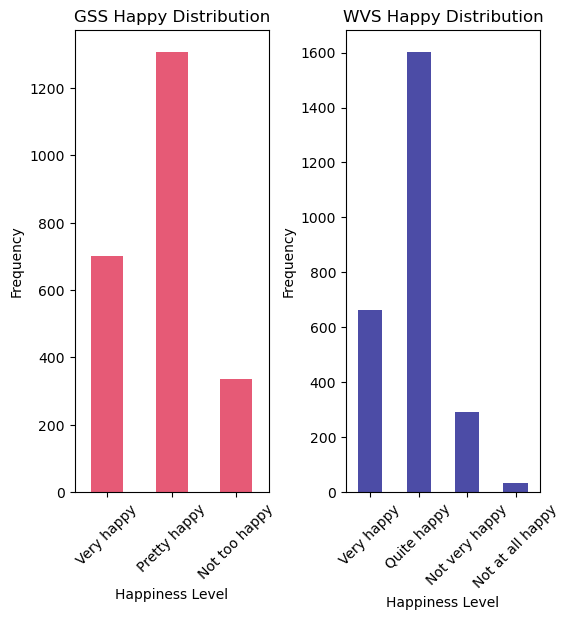

In [11]:
# GSS target value plot
gss_counts = df_gss["happy"].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
gss_counts.plot(
    kind="bar",
    color="crimson",
    alpha=0.7
)
plt.xlabel("Happiness Level")
plt.ylabel("Frequency")
plt.title("GSS Happy Distribution")
plt.xticks(
    range(len(gss_counts.index)),
    [gss_happy_code[i] for i in gss_counts.index],
    rotation=45
)

# WVS target value plot
wvs_counts = df_wvs["happy"].value_counts().sort_index()

plt.subplot(1,2,2)
plt.subplots_adjust(wspace=0.4)
wvs_counts.plot(
    kind="bar",
    color="navy",
    alpha=0.7
)
plt.xlabel("Happiness Level")
plt.ylabel("Frequency")
plt.title("WVS Happy Distribution")
plt.xticks(
    range(len(wvs_counts.index)),
    [wvs_happy_code[i] for i in wvs_counts.index],
    rotation=45
)

plt.show()

### 2.2.2 Investigating Other Variables

Examining the codebook shows a large number of irrelevant columns in both datasets (e.g. answers to the question of who in the house does laundry) or data that, if used in a model to predict happiness, would make the model close to tautological (e.g. answers to questions about levels of unhappiness being used to predict happiness).

Choosing all initial factors to use in our XGBoost model later on is its own problem. For now, we can choose one economic factor that is found in both datasets that covers individual income and investigate this as an example predictor. Across both datasets, income values are coded differently again and can be seen below.

The distributions across both variables and the number of missing values can be seen. The distributions for the income variables do not appear to resemble each other. We suspect this is due to the less generalizable income brackets GSS offers compared to the brackets offered in WVS.

From inspection of both codebooks, for example, some variables will need to be order encoded (e.g. income levels with natural order), and other variables will need to be one-hot encoded (e.g. marriage type).

In [12]:
# Define income codes
gss_income_code = {
    1: "Under $1,000",
    2: "$1,000 to $2,999",
    3: "$3,000 to $3,999",
    4: "$4,000 to $4,999",
    5: "$5,000 to $5,999",
    6: "$6,000 to $6,999",
    7: "$7,000 to $7,999",
    8: "$8,000 to $9,999",
    9: "$10,000 to $14,999",
    10: "$15,000 to $19,999",
    11: "$20,000 to $24,999",
    12: "$25,000 or over"
}

wvs_income_code = {
    1: "Low",
    2: "Medium",
    3: "High"
}

# Print income codes
print("GSS income codes:")
for code, description in gss_income_code.items():
    print(f"{code}: {description}")

print("\nWVS income codes:")
for code, description in wvs_income_code.items():
    print(f"{code}: {description}")

GSS income codes:
1: Under $1,000
2: $1,000 to $2,999
3: $3,000 to $3,999
4: $4,000 to $4,999
5: $5,000 to $5,999
6: $6,000 to $6,999
7: $7,000 to $7,999
8: $8,000 to $9,999
9: $10,000 to $14,999
10: $15,000 to $19,999
11: $20,000 to $24,999
12: $25,000 or over

WVS income codes:
1: Low
2: Medium
3: High


In [13]:
print("Value counts for GSS dataframe income variable:")
print(df_gss["rincome"].value_counts())
print(f"\nNull values of 'happy' variable: {df_gss['rincome'].isna().sum()}")

print("\nValue counts for WVS dataframe income variable:")
print(df_wvs["Q288R"].value_counts())
print(f"\nNull values of 'happy' variable: {df_wvs['Q288R'].isna().sum()}")

Value counts for GSS dataframe income variable:
rincome
12.0    899
11.0    107
9.0      94
10.0     61
8.0      33
1.0      33
2.0      32
3.0      32
5.0      21
4.0      21
7.0      18
6.0      12
Name: count, dtype: int64

Null values of 'happy' variable: 981

Value counts for WVS dataframe income variable:
Q288R
 2    1809
 1     518
 3     207
-2      52
-1       2
Name: count, dtype: int64

Null values of 'happy' variable: 0


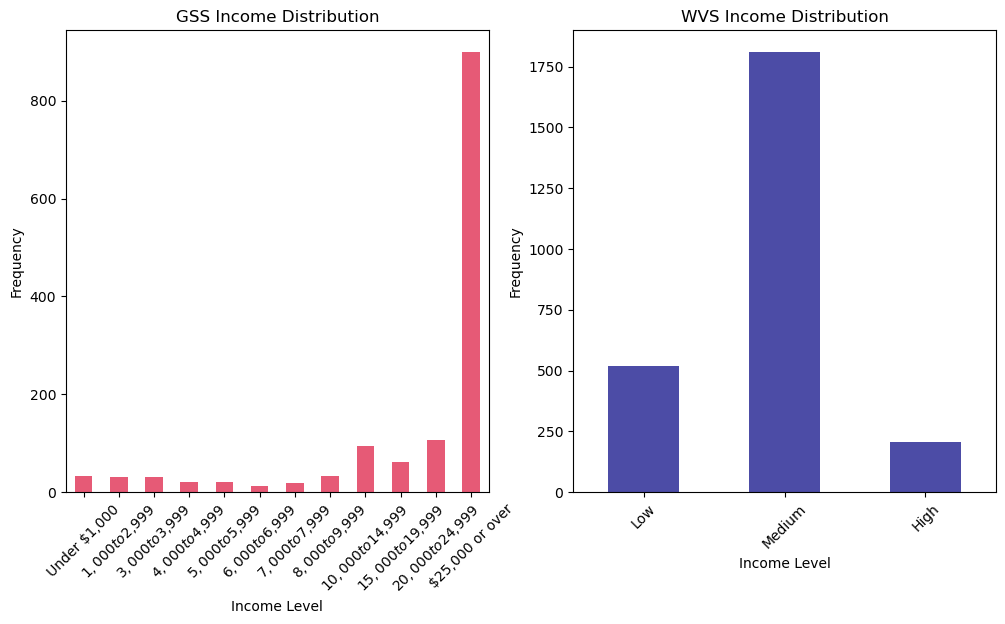

In [14]:
# GSS income plot
gss_counts = df_gss["rincome"].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
gss_counts.plot(
    kind="bar",
    color="crimson",
    alpha=0.7
)
plt.xlabel("Income Level")
plt.ylabel("Frequency")
plt.title("GSS Income Distribution")
plt.xticks(
    range(len(gss_counts.index)),
    [gss_income_code[i] for i in gss_counts.index],
    rotation=45
)

# WVS income plot
wvs_counts = df_wvs["Q288R"].value_counts().sort_index()[2:]  # Ignore coded missing values for plotting

plt.subplot(1,2,2)
plt.subplots_adjust(wspace=0.2)
wvs_counts.plot(
    kind="bar",
    color="navy",
    alpha=0.7
)
plt.xlabel("Income Level")
plt.ylabel("Frequency")
plt.title("WVS Income Distribution")
plt.xticks(
    range(len(wvs_counts.index)),
    [wvs_income_code[i] for i in wvs_counts.index],
    rotation=45
)

plt.show()

### 2.2.3 Key Findings

This exploratory data analysis has provided several key insights on how to precede and what to worry about moving forward, including:  

1. Both dataframes contain a significant number of missing values, with each row containing at least one missing value. Null values will need to be thoroughly investigated and addressed, potentially with imputation or interpolation.
    * Some null values are encoded and may be due a separate category distinguishing between reasons for why the value is missing.
    * Due to the sheer number of predictors, null values may be given a less specific imputation approach in the interest of time and simplification.
2. Both dataframes have a high number of columns, GSS having 1069 and WVS having 613. Data transformation or feature engineering will be needed to lower the number of columns for modeling.
    * Specifically, many columns are: irrelevant (e.g. `id`), are synonyms or antonyms for happiness (making prediction using them tautological), or are otherwise problematic for modeling.
    * This necessitates initial factor selection to lower the number of predictors drastically. Guidelines and documentation of the process will need to be laid out.
3. Both dataframes have column names that are currently difficult to decipher and lack clear descriptive meaning (e.g. `S007` for the WVS dataframe, and `spevwork` for the GSS dataframe). This necessitates thorough consultation of documentation to understand the dataframe column meanings.
4. Both dataframes contain observation values that lack clear meaning. Similarly to the point above, this necessitates thorough consultation of documentation to understand observation values.
5. While missing values and feature selection will be difficult challenges moving forward, the data appear to be accurate and valid as of yet.

# III. Methods

## 3.1 Overall Approach

To find the significant demographic, economic, social, and cultural factors that can predict happiness, the following will be the overall approach:

### 3.1.1. Initial factor selection

Relevant factors will need to be chosen from the over 1500 total factors across both surveys. For transparency and consistency, the guidelines are listed below:

* Must measure demographic, economic, social, or cultural factor
* Cannot measure happiness or unhappiness directly
* Cannot measure anyone other than responder
* Cannot measure the past
* Cannot measure the same topic multiple times
* Cannot measure something contigent on other measurements
* Cannot measure purely opinions or knowledge of responder
* Measurements have to have variance
* Measurements cannot have excess categories (10 or more)
* Measurements cannot be excessively missing (90% or more)

This process will require thorough investigation of both surveys' codebooks. Factors will be given informative names streamlining understanding later on in the modeling process.

### GSS

To begin selecting factors from the GSS, columns will excessive missing values (90% of more) will be removed. Only columns with variance will be kept.

In [15]:
# Drop columns with excessive missing values
missing_percent = df_gss.isnull().mean() * 100
cols_90_percent_missing = missing_percent[missing_percent >= 90].index

df_gss = df_gss.drop(columns=cols_90_percent_missing)

In [16]:
# Only keep columns with variance
df_gss = df_gss.loc[:, df_gss.nunique() != 1]

Next, page data including all columns in the GSS will be transferred from the codebook file `gss_codebook.pdf` in the `docs` folder to `gss_columns_raw.txt`. This will be further processed to `gss_columns_cleaned.txt` by removing irrelevant lines, putting all information to lowercase, and removing columns that are not found in the refined GSS dataframe. This will provide all the potentially relevant column names and column labels in a format that will expedite the choosing process for initial factor selection. Columns names and labels will be formed into a dictionary for column data understanding later on.

In [17]:
import re  # Handling regular expressions

GSS_COLUMNS_FILEPATH = "../docs/gss_columns_raw.txt"
PAGE_INDEX_PATTERN = r"^page \d+ index$"

gss_column_labels = {}

with open(GSS_COLUMNS_FILEPATH, "r") as file:
    for line in file:
        cleaned_line  = line.strip().lower()
        if re.match(PAGE_INDEX_PATTERN, cleaned_line):  # Ignore page numbers
            continue
        column_name, _, column_label = cleaned_line.partition(" ")
        if column_name in df_gss.columns:
            gss_column_labels[column_name] = column_label

In [18]:
GSS_COLUMNS_FILEPATH_CLEANED = "../docs/gss_columns_cleaned.txt"

with open(GSS_COLUMNS_FILEPATH_CLEANED, "w") as file:
    for column_name, column_label in gss_column_labels.items():
        file.write(f"{column_name},{column_label}\n")

Finally, using the guidelines in 3.1.1, the final initially chosen columns will be saved as `gss_columns_final.txt` in `docs`. The GSS dataframe will be reduced to just these columns to prepare the data to be preprocessed.

In [19]:
GSS_COLUMNS_FILEPATH_FINAL = "../docs/gss_columns_final.txt"

with open(GSS_COLUMNS_FILEPATH_FINAL, "r") as file:
    column_names_chosen = [line.split(",")[0] for line in file]

# Only include chosen columns
gss_column_labels = {column_name: column_label for column_name, column_label in gss_column_labels.items() if column_name in column_names_chosen}

df_gss = df_gss[gss_column_labels.keys()]

### WVS

To begin selecting factors from the WVS, columns will excessive missing values (90% of more) will be removed. The dataframe will be split into floating point values and integer values for handling missing values. Only columns with variance will be kept.

In [20]:
# Only keep columns with variance
df_wvs = df_wvs.loc[:, df_wvs.nunique() != 1]

In [21]:
# Show dtypes
df_wvs.dtypes.unique()

# Separate by dtype
df_wvs_int = df_wvs.select_dtypes(include=["int64"])
df_wvs_float = df_wvs.select_dtypes(include=["float64"])

display(df_wvs.select_dtypes(include=["object"]))  # Object columns are unnecessary upon investigation

,LNGE_ISO,X002_02B,V002A_01,V001A_01,Partyname
89769,en,US,US,US,NaN
89770,en,US,US,US,Other
89771,en,US,US,US,Don´t know
89772,en,US,US,US,Other
89773,en,US,US,US,NaN
...,...,...,...,...,...
92360,en,US,MX,MX,NaN
92361,en,US,DO,AW,Other
92362,en,US,US,US,NaN
92363,en,-2,-2,-2,NaN


In [22]:
# Columns with more than 90% missing values
print(f"{df_wvs_int.isna().sum().sum()} 'int64' columns with missing values (i.e. NaN inputs)")
print(f"{(df_wvs_int.apply(lambda x: ((x < 0))).mean() > 0.9).sum()} 'int64' columns with more than 90% missing values (i.e. < 0 inputs, denoting missing for any reason)")
print(f"{(df_wvs_float.isna().mean() > 0.9).sum()} 'float64' point columns with more than 90% missing values")

0 'int64' columns with missing values (i.e. NaN inputs)
0 'int64' columns with more than 90% missing values (i.e. < 0 inputs, denoting missing for any reason)
0 'float64' point columns with more than 90% missing values


Next, page data including columns in the WVS will be transferred from the codebook file `wvs_codebook.pdf` in the `docs` folder to `wvs_columns_raw.txt`. This will be further processed to `wvs_columns_cleaned.txt` by removing irrelevant lines and removing columns that are not found in the refined WVS dataframe. This will provide all the potentially relevant column names and column labels in a format that will expedite the choosing process for initial factor selection.

Cross-referencing with the codebook, the only columns where we suspect this process will be time-saving is for the questions with column names beginning with 'Q' (i.e. 'Q1', 'Q2', etc.). Other columns names and labels will be formed into a dictionary manually (or will be discarded) for column data understanding later on.

In [23]:
WVS_COLUMNS_FILEPATH = "../docs/wvs_columns_raw.txt"

wvs_column_labels = {
    # Target value - int64
    "happy": "Feeling of happiness",
    # WVS index values - float64
    "SACSECVAL": "SACSECVAL.- Welzel Overall Secular Values",
    "RESEMAVAL": "RESEMAVAL.- Welzel emancipative values",
    "I_AUTHORITY": "AUTHORITY - Welzel defiance - 1: Inverse respect for authority",
    "I_NATIONALISM": "NATIONALISM - Welzel defiance - 2: Inverse national pride",
    "I_DEVOUT": "DEVOUT- Welzel defiance - 3: Inverse devoutness",
    "DEFIANCE": "DEFIANCE.- Welzel defiance sub-index",
    "I_RELIGIMP": "RELIGIMP - Welzel disbelief1: Inverse importance of religion",
    "I_RELIGBEL": "RELIGBEL - Welzel disbelief2: Inverse religious person",
    "I_RELIGPRAC": "RELIGPRAC - Welzel disbelief- 3: Inverse religious practice",
    "DISBELIEF": "DISBELIEF.- Welzel disbelief sub-index",
    "I_NORM1": "NORM1 - Welzel relativism- 1: Inverse norm conform1",
    "I_NORM2": "NORM2 - Welzel relativism- 2: Inverse norm conform2",
    "I_NORM3": "NORM3 - Welzel relativism- 3: Inverse norm conform3",
    "RELATIVISM": "RELATIVISM.- Welzel relativism",
    "I_TRUSTARMY": "TRUSTARMY- Welzel skepticism- 1: Inverse trust in army",
    "I_TRUSTPOLICE": "TRUSTPOLICE- Welzel skepticism- 2: Inverse trust in police",
    "I_TRUSTCOURTS": "TRUSTCOURTS- Welzel skepticism- 3: Inverse trust in courts",
    "SCEPTICISM": "SCEPTICISM.- Welzel skepticism index",
    "I_INDEP": "INDEP- Welzel autonomy-1: Independence as kid quality",
    "I_IMAGIN": "IMAGIN- Welzel autonomy-2: Imagination as kid quality",
    "I_NONOBED": "Emancipative Values-1: Obedience not kid quality",
    "AUTONOMY": "AUTONOMY.- Wezel Autonomy sub index",
    "I_WOMJOB": "WOMJOB- Welzel equality-1: Gender equality: job",
    "I_WOMPOL": "WOMPOL- Welzel equality-2: Gender equality: politics ",
    "I_WOMEDU": "WOMEDU- Welzel equality-3: Gender equality: education",
    "EQUALITY": "Emancipative Values-2: Equality sub-index",
    "I_HOMOLIB": "HOMOLIB- Welzel choice-1: Homosexuality acceptance",
    "I_ABORTLIB": "ABORTLIB- Welzel choice-2: Abortion acceptable ",
    "I_DIVORLIB": "DIVORLIB- Welzel choice-3: Divorce acceptable",
    "CHOICE": "CHOICE.- Welzel choice subindex",
    "I_VOICE1": "VOICE1- Welzel voice-1",
    "I_VOICE2": "VOICE2- Welzel voice-2",
    "I_VOI2_00": "VOI2_00- Welzel voice-3 (auxiliary)",
    "VOICE": "VOICE.- Welzel voice subindex ",
    # WVS index values - int64
    "Y001": "Post-Materialist index 12-item",
    "Y003": "Autonomy Index",
    # WVS miscellaneous non-question values - int64 
    "N_REGION_ISO": "Region ISO 3166-2",
    "G_TOWNSIZE": "Settlement size_8 groups",
    "H_SETTLEMENT": "Settlement type",
    "H_URBRURAL": "Urban-Rural",
}

with open(WVS_COLUMNS_FILEPATH, "r", encoding="utf-8") as file:
    for line in file:
        cleaned_line = line.strip()
        if cleaned_line.startswith("Q"):  # Filter for questions
            column_name, _, column_label = cleaned_line.partition(" ")
            if column_name in df_wvs.columns:
                wvs_column_labels[column_name] = column_label

In [24]:
WVS_COLUMNS_FILEPATH_CLEANED = "../docs/wvs_columns_cleaned.txt"

with open(WVS_COLUMNS_FILEPATH_CLEANED, "w") as file:
    for column_name, column_label in wvs_column_labels.items():
        file.write(f"{column_name},{column_label}\n")

In [25]:
WVS_COLUMNS_FILEPATH_CLEANED = "../docs/wvs_columns_cleaned.txt"

with open(WVS_COLUMNS_FILEPATH_CLEANED, "w") as file:
    for column_name, column_label in wvs_column_labels.items():
        file.write(f"{column_name},{column_label}\n")

Finally, using the guidelines in 3.1.1, the initially chosen columns will be finalized. The WVS dataframe will be reduced to just these columns to prepare the data to be preprocessed.

In [26]:
WVS_COLUMNS_FILEPATH_FINAL = "../docs/wvs_columns_final.txt"

with open(WVS_COLUMNS_FILEPATH_FINAL, "r") as file:
    column_names_chosen = [line.split(",")[0] for line in file]

# Only include chosen columns
wvs_column_labels = {column_name: column_label for column_name, column_label in wvs_column_labels.items() if column_name in column_names_chosen}

df_wvs_int = df_wvs_int.filter(wvs_column_labels.keys(), axis=1)
df_wvs_float = df_wvs_float.filter(wvs_column_labels.keys(), axis=1)

### 3.1.2. Data preprocessing:

Data cleaning will involve a rigorous process of:

* Checking for and removing duplicates (if necessary).
* Checking for outliers and low-frequency categories and adjusting the data accordingly.
    * We suspect there will be almost no outliers, if any. However, low-frequency categories will be a problem in both datasets and will involve grouping all low-frequency categories in a factor together or onto the nearest fitting category. Near-constant features will be removed.
* Checking for missing values and adjusting the data accordingly and requires a thorough pipeline.
    * This requires accounting for encoding for missing values.
    * This depends on data type:
        * Categorical values will use simple imputation with mode.
        * Floating point and integer values will use k-nearest neighbors (KNN) imputation.

Feature engineering will involve a rigorous process of:

* Removing redundant features based on correlational analysis.
* Developing a pipeline to:
    * Encode ordinal and non-ordinal categories accordingly.
    * Scale floating point and integer values with robust scaler.

### GSS

To begin, duplicates will be checked and removed (if necessary).

In [27]:
print(f"Total duplicates across all columns: {df_gss.duplicated().sum()}")

Total duplicates across all columns: 0


Next, we will take overview statistics of missing values to prepare for proper handling of these values. For precise imputation of missing values, factors will need to be labeled as being ordinal categorical, non-ordinal categorical, or numeric. This information will be added to `gss_columns_final.txt` in `docs`.

In [28]:
print(f"Mean number of missing values: {(df_gss.isna().mean()).mean():.4f}")

print(f"\nLoss of proportion of dataframe if all missing values are dropped: {1 - df_gss.dropna().index.size / df_gss.index.size:.4f}")

Mean number of missing values: 0.3642

Loss of proportion of dataframe if all missing values are dropped: 1.0000


In [29]:
gss_column_types = {
    "ordinal": [],
    "nominal": [],
    "numeric": []
}

with open(GSS_COLUMNS_FILEPATH_FINAL, "r") as file:
    for line in file:
        cleaned_line = line.strip().split(",")
        column_name, _, column_type = cleaned_line
        gss_column_types[column_type].append(column_name)

gss_column_types["ordinal"].remove("happy")  # Unnecssary since this is the target value

Next, we will check for outliers using Z-score (> 3) definition. Given a considerable proportion of total observations with numeric outliers, `RobustScaler` will be chosen to reduce the impact of outliers moving forward.

In [30]:
from scipy import stats

unique_outlier_indexes = set()

# Numeric outliers
for column_name in gss_column_types["numeric"]:
    # Drop missing values
    col_data = df_gss[column_name].dropna()

    # Find outliers
    z_scores = np.abs(stats.zscore(col_data))
    outlier_indexes = col_data[z_scores >= 3].index

    unique_outlier_indexes.update(outlier_indexes)

    # Display results
    if not outlier_indexes.empty:
        print(f"Found {100 * len(outlier_indexes) / len(col_data):.2f}% outliers in column '{column_name}'.")
    else:
        print(f"No outliers found in column '{column_name}'.")

print(f"\n{100* len(unique_outlier_indexes) / df_gss.index.size:.2f}% total unique indexes containing any outliers.")

Found 1.33% outliers in column 'sibs'.
No outliers found in column 'age'.
Found 0.78% outliers in column 'agekdbrn'.
Found 1.90% outliers in column 'emailhr'.
Found 2.06% outliers in column 'wwwhr'.
Found 1.98% outliers in column 'yearsjob'.
Found 2.71% outliers in column 'moredays'.
Found 1.35% outliers in column 'hrsrelax'.
Found 1.23% outliers in column 'weight'.
Found 0.29% outliers in column 'height'.
Found 2.97% outliers in column 'numpets'.
No outliers found in column 'numorg'.
Found 3.52% outliers in column 'conrinc'.
Found 0.67% outliers in column 'yearsusa'.

11.26% total unique indexes containing any outliers.


Low-frequency categories will be handled by:

* Checking for the frequency of each category for all ordinal and nominal categorical factors.
* If their frequency is less than 1%, it will be considered a low-frequency category.
* If the sum frequencies of all low frequency categories in a factor exceeds 1%, it will assigned an "other" category.
    * For ordinal factors, this will be the midpoint of the highest and lowest possible values.
    * For nominal factors, this will be a value of "Other".
* Otherwise, all low frequency categories will have their values replaced with null values and these will be imputed later on.

Category frequency will be checked for the target variable as well. We will adjust more liberally the target value due to its significance.

In [31]:
# Low-frequency categories
THRESHOLD = 0.01

for column_type, columns in gss_column_types.items():
    if column_type == "numeric":
        continue
    for column_name in columns:
        # Calculate value frequencies
        freq = df_gss[column_name].value_counts(normalize=True)
            
        # Identify low-frequency categories
        low_freq = freq[freq < THRESHOLD].index.tolist()
        low_freq_prop = freq[freq < THRESHOLD].sum()

        # Convert low-frequency categories to missing values
        if low_freq and low_freq_prop < 0.01:
            df_gss[column_name] = df_gss[column_name].replace(low_freq, np.nan).copy()

        # Convert low-frequency categories to maximum + 1 or midpoint
        elif low_freq_prop >= 0.01 and column_type == "nominal":
            over_maximum = df_gss[column_name].max() + 1
            df_gss[column_name] = df_gss[column_name].replace(low_freq, over_maximum).copy()
        elif low_freq_prop >= 0.01 and column_type == "ordinal":
            midpoint = (df_gss[column_name].min() + df_gss[column_name].max()) / 2
            df_gss[column_name] = df_gss[column_name].replace(low_freq, midpoint).copy()

In [32]:
# Display statistics
print(df_gss["happy"].value_counts(normalize=True))

happy
2.0    0.557594
1.0    0.299061
3.0    0.143345
Name: proportion, dtype: float64


Next, we will attempt to remove redundant features using correlational analysis. A threshold of `0.7` is chosen here for correlation coefficient between two columns. The column with less issues (high number of categories, high number of missing values, etc.) will be dropped.

In [33]:
# Define X
X_gss = df_gss.drop(columns="happy").copy()

# Get correlation matrix
corr_matrix = X_gss.corr().abs() 

# Identify highly correlated variables
THRESHOLD = 0.7
highly_correlated = [(i, j) for i in range(len(corr_matrix.columns)) 
                     for j in range(i+1, len(corr_matrix.columns)) 
                     if abs(corr_matrix.iloc[i, j]) > THRESHOLD]

# Print statistics for each redundant column to decide which one to drop
for i, j in highly_correlated:
    col1 = X_gss.columns[i]
    col2 = X_gss.columns[j]

    print(f"Column '{col1}':")
    print(f"    Missing %:     {100 * X_gss[col1].isna().mean():.2f}%")
    print(f"    Unique Values: {X_gss[col1].nunique()}")

    print(f"Column '{col2}':")
    print(f"    Missing %:     {100 * X_gss[col2].isna().mean():.2f}%")
    print(f"    Unique Values: {X_gss[col2].nunique()}\n")

Column 'marital':
    Missing %:     0.09%
    Unique Values: 5
Column 'marcohab':
    Missing %:     0.34%
    Unique Values: 3

Column 'educ':
    Missing %:     0.13%
    Unique Values: 13
Column 'degree':
    Missing %:     0.00%
    Unique Values: 5

Column 'health':
    Missing %:     33.11%
    Unique Values: 4
Column 'hlthphys':
    Missing %:     0.73%
    Unique Values: 5

Column 'safetywk':
    Missing %:     40.10%
    Unique Values: 4
Column 'teamsafe':
    Missing %:     40.36%
    Unique Values: 4

Column 'teamsafe':
    Missing %:     40.36%
    Unique Values: 4
Column 'safehlth':
    Missing %:     40.06%
    Unique Values: 3



In [34]:
# Drop redundant variables
X_gss = X_gss.drop(columns=["marital", "degree", "health", "teamsafe"])

In [35]:
updated_column_types = {}
for column_type, columns in gss_column_types.items():
    updated_columns = [column_name for column_name in columns if column_name in X_gss.columns.tolist()]
    updated_column_types[column_type] = updated_columns

gss_column_types = updated_column_types

Finally, we will design and display a preprocessing pipeline for handling missing values per column type and encoding categorical data and scaling numeric data accordingly.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Define preprocessing steps for each column type
numeric_transformer = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=15,
                           weights="distance")),
    ("scaler", RobustScaler())
])

ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

# Define and display preprocessing pipeline
gss_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, gss_column_types["numeric"]),
        ("ord", ordinal_transformer, gss_column_types["ordinal"]),
        ("nom", nominal_transformer, gss_column_types["nominal"])
    ]
)

display(gss_preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=15,
                                                             weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 ['sibs', 'age', 'agekdbrn', 'emailhr', 'wwwhr',
                                  'yearsjob', 'moredays', 'hrsrelax', 'weight',
                                  'height', 'numpets', 'numorg', 'conrinc',
                                  'yearsusa']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['wrkstat', 'evwork', 'wrkslf', 'divorce',
                                  'widowed', 'childs', 'major1', 'sex', 'race',
                                  'born', 'partyid', 'relig', 'postlife',
                                  'partfull', 'othlang', 'compuse', 'webmob',
                                  'wrktype', 'wrksched', 'mustwork', 'secondwk',
                                  'partteam', 'hvylift', 'handmove', 'strredpg',
                                  'hyperten', 'arthrtis', 'diabetes',
                                  'workfor1', 'empinput', ...])])

### WVS

First, duplicates will be checked and removed (if necessary).

In [37]:
print(f"Total duplicates across all columns: {pd.merge(df_wvs_int, df_wvs_float, left_index=True, right_index=True).duplicated().sum()}")

Total duplicates across all columns: 0


Next, we will investigate missing values. For precise imputation of missing values, factors will need to be labeled as being ordinal categorical, non-ordinal categorical, or numeric. This information will be added to `wvs_columns_final.txt` in `docs`.

In [38]:
print(f"Mean number of missing values for 'int64' columns: {((df_wvs_int < 0).mean()).mean():.4f}")
print(f"Mean number of missing values for 'float64' columns: {df_wvs_float.isna().mean().mean():.4f}")

print(f"\nLoss of proportion of dataframe if all missing values are dropped for 'int64' columns: {1 - df_wvs_int.map(lambda x: np.nan if x < 0 else x).dropna().index.size / df_wvs_int.index.size:.4f}")
print(f"Loss of proportion of dataframe if all missing values are dropped for 'float64' columns: {1 - df_wvs_float.dropna().index.size / df_wvs_float.index.size:.4f}")

Mean number of missing values for 'int64' columns: 0.0218
Mean number of missing values for 'float64' columns: 0.0079

Loss of proportion of dataframe if all missing values are dropped for 'int64' columns: 0.7148
Loss of proportion of dataframe if all missing values are dropped for 'float64' columns: 0.1051


In [39]:
wvs_column_types = {
    "ordinal": [],
    "nominal": [],
    "numeric": []
}

with open(WVS_COLUMNS_FILEPATH_FINAL, "r") as file:
    for line in file:
        cleaned_line = line.strip().split(",")
        column_name, _, column_type = cleaned_line
        wvs_column_types[column_type].append(column_name)

wvs_column_types["ordinal"].remove("happy")  # Unnecssary since this is the target value

Next, we will check for outliers using Z-score (> 3) definition and low-frequency categories. Given a considerable proportion of total observations with numeric outliers, `RobustScaler` will be chosen to reduce the impact of outliers moving forward.

In [40]:
unique_outlier_indexes = set()

# Numeric outliers
for column_name in wvs_column_types["numeric"]:
    # Drop missing values
    col_data = df_wvs[column_name].dropna()
    
    z_scores = np.abs(stats.zscore(col_data))
    outlier_indexes = col_data[z_scores >= 3].index

    unique_outlier_indexes.update(outlier_indexes)
    
    if not outlier_indexes.empty:
        print(f"Found {100 * len(outlier_indexes) / len(col_data):.2f}% outliers in column '{column_name}'.")
    else:
        print(f"No outliers found in column '{column_name}'.")

print(f"\n{100* len(unique_outlier_indexes) / df_wvs.index.size:.2f}% total unique indexes containing any outliers.")

Found 0.08% outliers in column 'SACSECVAL'.
No outliers found in column 'RESEMAVAL'.
No outliers found in column 'I_AUTHORITY'.
No outliers found in column 'I_NATIONALISM'.
No outliers found in column 'I_DEVOUT'.
Found 0.35% outliers in column 'DEFIANCE'.
No outliers found in column 'I_RELIGIMP'.
No outliers found in column 'I_RELIGBEL'.
No outliers found in column 'I_RELIGPRAC'.
No outliers found in column 'DISBELIEF'.
No outliers found in column 'I_NORM1'.
No outliers found in column 'I_NORM2'.
No outliers found in column 'I_NORM3'.
No outliers found in column 'RELATIVISM'.
No outliers found in column 'I_TRUSTARMY'.
No outliers found in column 'I_TRUSTPOLICE'.
No outliers found in column 'I_TRUSTCOURTS'.
No outliers found in column 'SCEPTICISM'.
No outliers found in column 'I_INDEP'.
No outliers found in column 'I_IMAGIN'.
No outliers found in column 'I_NONOBED'.
No outliers found in column 'AUTONOMY'.
Found 4.72% outliers in column 'I_WOMJOB'.
No outliers found in column 'I_WOMPOL'.

Low-frequency categories will be handled by:

* Checking for the frequency of each category for all ordinal and nominal categorical factors.
* If their frequency is less than 1%, it will be considered a low-frequency category.
* If the sum frequencies of all low frequency categories in a factor exceeds 1%, it will assigned an "other" category.
    * For ordinal factors, this will be the midpoint of the highest and lowest possible values.
    * For nominal factors, this will be a value of "Other".
* Otherwise, all low frequency categories will have their values replaced with null values and these will be imputed later on.

Category frequency will be checked for the target variable as well. We will adjust more liberally the target value due to its significance.

In [41]:
df_wvs = pd.merge(df_wvs_int, df_wvs_float, left_index=True, right_index=True)

# Low-frequency categories
THRESHOLD = 0.01

for column_type, columns in wvs_column_types.items():
    if column_type == "numeric":
        continue
    for column_name in columns:
        # Calculate value frequencies
        freq = df_wvs[column_name].value_counts(normalize=True)
            
        # Identify low-frequency categories
        low_freq = freq[freq < THRESHOLD].index.tolist()
        low_freq_prop = freq[freq < THRESHOLD].sum()

        # Convert low-frequency categories to missing values
        if low_freq and low_freq_prop < 0.01:
            df_wvs[column_name] = df_wvs[column_name].replace(low_freq, np.nan).copy()

        # Convert low-frequency categories to maximum + 1 or midpoint
        elif low_freq_prop >= 0.01 and column_type == "nominal":
            over_maximum = df_wvs[column_name].max() + 1
            df_wvs[column_name] = df_wvs[column_name].replace(low_freq, over_maximum).copy()
        elif low_freq_prop >= 0.01 and column_type == "ordinal":
            midpoint = (df_wvs[column_name].min() + df_wvs[column_name].max()) / 2
            df_wvs[column_name] = df_wvs[column_name].replace(low_freq, midpoint).copy()

In [42]:
# Display statistics
print("Unique values and proportions for target variable")
print(df_wvs["happy"].value_counts(normalize=True))

# Adjust
df_wvs["happy"] = df_wvs["happy"].replace(4, 3)
del wvs_happy_code[4]

Unique values and proportions for target variable
happy
2    0.619011
1    0.255796
3    0.112442
4    0.012751
Name: proportion, dtype: float64


Next, we will attempt to remove redundant features using correlational analysis. A threshold of `0.7` is chosen here for correlation coefficient between two columns. The column with less issues (high number of categories, high number of missing values, etc.) will be dropped.

In [43]:
# Define X
X_wvs = df_wvs.drop(columns="happy").copy()

# Get correlation matrix
corr_matrix = X_wvs.select_dtypes(include=["number"]).corr().abs() 

# Identify highly correlated variables
THRESHOLD = 0.7
highly_correlated = [(i, j) for i in range(len(corr_matrix.columns)) 
                     for j in range(i+1, len(corr_matrix.columns)) 
                     if abs(corr_matrix.iloc[i, j]) > THRESHOLD]

# Print statistics for each redundant column to decide which one to drop
for i, j in highly_correlated:
    col1 = X_wvs.columns[i]
    col2 = X_wvs.columns[j]

    print(f"Column '{col1}':")
    print(f"    Missing %:     {100 * X_wvs[col1].isna().mean():.2f}%")
    print(f"    Unique Values: {X_wvs[col1].nunique()}")

    print(f"Column '{col2}':")
    print(f"    Missing %:     {100 * X_wvs[col2].isna().mean():.2f}%")
    print(f"    Unique Values: {X_wvs[col2].nunique()}\n")

Column 'Y001':
    Missing %:     0.00%
    Unique Values: 7
Column 'I_VOI2_00':
    Missing %:     3.63%
    Unique Values: 11

Column 'Y001':
    Missing %:     0.00%
    Unique Values: 7
Column 'VOICE':
    Missing %:     1.12%
    Unique Values: 18

Column 'Q6':
    Missing %:     0.58%
    Unique Values: 4
Column 'Q164':
    Missing %:     0.54%
    Unique Values: 10

Column 'Q6':
    Missing %:     0.58%
    Unique Values: 4
Column 'Q172':
    Missing %:     0.54%
    Unique Values: 8

Column 'Q6':
    Missing %:     0.58%
    Unique Values: 4
Column 'I_RELIGIMP':
    Missing %:     0.58%
    Unique Values: 4

Column 'Q6':
    Missing %:     0.58%
    Unique Values: 4
Column 'DISBELIEF':
    Missing %:     0.19%
    Unique Values: 65

Column 'Q27':
    Missing %:     0.31%
    Unique Values: 4
Column 'I_DEVOUT':
    Missing %:     0.31%
    Unique Values: 4

Column 'Q136':
    Missing %:     0.73%
    Unique Values: 4
Column 'Q137':
    Missing %:     0.62%
    Unique Values: 4



In [44]:
# Drop redundant variables
X_wvs = X_wvs.drop(columns=["I_VOI2_00", "VOICE", "Q164", "Q172", "Q6", "Q27", "Q136", "Q167",
                            "Q171", "Q254", "RESEMAVAL", "DEFIANCE", "DISBELIEF", "RELATIVISM",
                            "SCEPTICISM", "EQUALITY", "CHOICE", "I_VOI2_00", "VOICE"])

In [45]:
# Update column types dictionary
updated_column_types = {}
for column_type, columns in wvs_column_types.items():
    updated_columns = [column_name for column_name in columns if column_name in X_wvs.columns.tolist()]
    updated_column_types[column_type] = updated_columns

wvs_column_types = updated_column_types

Finally, we will design and display a preprocessing pipeline for handling missing values per column type and encoding categorical data and scaling numeric data accordingly.

In [46]:
# Define and display preprocessing pipeline
wvs_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, wvs_column_types["numeric"]),
        ("ord", ordinal_transformer, wvs_column_types["ordinal"]),
        ("nom", nominal_transformer, wvs_column_types["nominal"])
    ]
)

display(wvs_preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=15,
                                                             weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 ['SACSECVAL', 'I_AUTHORITY', 'I_NATIONALISM',
                                  'I_DEVOUT', 'I_RELIGIMP', 'I_RELIGBEL',
                                  'I_RELIGPRAC', 'I_NORM1', 'I_NORM2',
                                  'I_NORM3', 'I_TRUSTARMY', 'I_TRUSTPOLICE',
                                  'I_TRUSTCOURTS', 'I_INDEP', 'I_IMAGIN',
                                  'I_NONOBED', 'AUTON...
                                  'Q132', 'Q133', 'Q134', 'Q135', 'Q137',
                                  'Q138', 'Q142', 'Q143', 'Q199', 'Q240',
                                  'Q255', 'Q256', ...]),
                                ('nom',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['N_REGION_ISO', 'H_SETTLEMENT', 'H_URBRURAL',
                                  'Q139', 'Q140', 'Q141', 'Q151', 'Q166',
                                  'Q168', 'Q223', 'Q260', 'Q263', 'Q266',
                                  'Q269', 'Q271', 'Q272', 'Q273', 'Q279',
                                  'Q281', 'Q284', 'Q285', 'Q289', 'Q290'])])

### 3.1.3 Modeling:

Modeling the data will involve a rigorous process of:

* Stratified splitting of the data into a training dataset (≈80%) and testing dataset (≈20%).
* Developing a thorough pipeline:
    * Utilizing 5-fold cross-validation data splitting.
    * Training an XGBoost model scoring based on F1-score averaged across classes. XGBoost is chosen since:
        * It performs well with high-dimensional data, which is expected.
        * It can capture potential non-linear relationships of features and interactions between features, which is common for sociological and pyschological data.
        * It is robust to outliers.
        * It can handle large datasets well.
        * The resulting model is readily interpretable for understanding feature importance. 
    * Hyperparameter tuning using random search.
* Evaluating the model performance with a confusion matrix, overall and class-wise metrics across accuracy, mean absolute error, Cohen's kappa, precision, recall, and F1-score.

### GSS

The process for the GSS data through a robust preprocessing and modeling pipeline:

In [47]:
import xgboost
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

def hyperparameter_tuning(X, y, preprocessor, param_grid, random_seed, n_iter):
    """Perform hyperparameter tuning using RandomizedSearchCV."""

    # Define model
    xgb_model = xgboost.XGBClassifier()
    
    # Define pipeline
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", xgb_model)
    ])

    # Define 5-fold cross-validation
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=random_seed
    )

    # Perform hyperparameter tuning
    tuned_model = RandomizedSearchCV(
        pipeline,
        param_grid,
        cv=cv,
        scoring="f1_macro",
        n_iter=n_iter,
        random_state=random_seed
    )

    # Fit model
    tuned_model.fit(X, y)

    return tuned_model

In [48]:
# Define y
y_gss = df_gss["happy"] - 1  # [1, 2, 3] -> [0, 1, 2]

# Define random seed
RANDOM_SEED = 123

# Train-test split
X_train_gss, X_test_gss, y_train_gss, y_test_gss = train_test_split(
    X_gss, y_gss,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y_gss
)

# Define hyperparameter tuning space
param_grid = {
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.1, 0.05, 0.01],
    "model__n_estimators": [50, 100, 200],
    "model__gamma": [0, 0.25, 1],
    "model__subsample": [0.5, 0.75, 1],
    "model__colsample_bytree": [0.5, 0.75, 1],
    "model__reg_alpha": [0, 0.1, 1],
    "model__reg_lambda": [0, 0.1, 1],
    "model__min_child_weight": [1, 5, 10]
}

# Define number of iterations
N_ITER = 20

In [49]:
# Fit and display model
gss_model_fit = hyperparameter_tuning(
    X=X_train_gss,
    y=y_train_gss,
    preprocessor=gss_preprocessor,
    param_grid=param_grid,
    random_seed=RANDOM_SEED,
    n_iter=N_ITER
)

display(gss_model_fit)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer(n_neighbors=15,
                                                                                                           weights='distance')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['sibs',
                                                                                'age',
                                                                                'agekdbrn',
                                                                                'emailhr',
                                                                                'wwwhr',
                                                                                'yearsjob',
                                                                                'moredays',
                                                                                'hrsrelax',
                                                                                'weight',
                                                                                'h...
                   param_distributions={'model__colsample_bytree': [0.5, 0.75,
                                                                    1],
                                        'model__gamma': [0, 0.25, 1],
                                        'model__learning_rate': [0.1, 0.05,
                                                                 0.01],
                                        'model__max_depth': [3, 5, 7],
                                        'model__min_child_weight': [1, 5, 10],
                                        'model__n_estimators': [50, 100, 200],
                                        'model__reg_alpha': [0, 0.1, 1],
                                        'model__reg_lambda': [0, 0.1, 1],
                                        'model__subsample': [0.5, 0.75, 1]},
                   random_state=123, scoring='f1_macro')

### WVS

The process for the WVS data through a robust preprocessing and modeling pipeline:

In [50]:
# Define y
y_wvs = df_wvs["happy"] - 1  # [1, 2, 3] -> [0, 1, 2]

# Train-test split
X_train_wvs, X_test_wvs, y_train_wvs, y_test_wvs = train_test_split(
    X_wvs, y_wvs,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y_wvs
)

In [51]:
# Fit and display model
wvs_model_fit = hyperparameter_tuning(
    X=X_train_wvs,
    y=y_train_wvs,
    preprocessor=wvs_preprocessor,
    param_grid=param_grid,
    random_seed=RANDOM_SEED,
    n_iter=N_ITER
)

display(wvs_model_fit)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer(n_neighbors=15,
                                                                                                           weights='distance')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['SACSECVAL',
                                                                                'I_AUTHORITY',
                                                                                'I_NATIONALISM',
                                                                                'I_DEVOUT',
                                                                                'I_RELIGIMP',
                                                                                'I_RELIGBEL',
                                                                                'I_RELI...
                   param_distributions={'model__colsample_bytree': [0.5, 0.75,
                                                                    1],
                                        'model__gamma': [0, 0.25, 1],
                                        'model__learning_rate': [0.1, 0.05,
                                                                 0.01],
                                        'model__max_depth': [3, 5, 7],
                                        'model__min_child_weight': [1, 5, 10],
                                        'model__n_estimators': [50, 100, 200],
                                        'model__reg_alpha': [0, 0.1, 1],
                                        'model__reg_lambda': [0, 0.1, 1],
                                        'model__subsample': [0.5, 0.75, 1]},
                   random_state=123, scoring='f1_macro')

### 3.1.4 Feature Importance:

Feature importance will be calculated using:

* XGBoost's built-in feature importance where importance is aggregated across one-hot encoded nominal features.
* Model-agnostic permutation importance, assessing features based on F1-score degradation (raw and relative percent decrease).

### GSS

Feature importance and permutation importance calculations for GSS data:

In [52]:
def extract_feature_importance(model, preprocessor_step_name="preprocessor", model_step_name="model"):
    """Extract feature importance from a RandomizedSearchCV model."""
    # Get feature importance and corresponding names
    feature_importance = model.best_estimator_.named_steps[model_step_name].feature_importances_
    feature_names = model.best_estimator_.named_steps[preprocessor_step_name].get_feature_names_out()

    # Combine into dataframe
    feature_importance_df = pd.DataFrame({
        "feature": feature_names,
        "importance": feature_importance
    })

    # Sort by importance
    feature_importance_df = feature_importance_df

    return feature_importance_df

In [53]:
def pool_nom_features(feature_importance_df):
    """Pool features starting with 'nom__' based on their original feature."""
    # Filter features starting with 'nom__'
    nom_features_df = feature_importance_df[feature_importance_df["feature"].str.startswith("nom__")].copy()
    
    # Extract original feature name
    nom_features_df["original_feature"] = nom_features_df["feature"].str.extract(r"nom__(.*)_\d+")
    
    # Group by original feature and sum importance
    pooled_importance_df = nom_features_df.groupby("original_feature")["importance"].sum().reset_index()
    pooled_importance_df = pooled_importance_df.rename(columns={"original_feature": "feature"})
    
    # Remove 'nom__' features from original DataFrame
    updated_importance_df = feature_importance_df[~feature_importance_df["feature"].str.startswith("nom__")]

    # Append pooled 'nom__' features to updated DataFrame
    updated_importance_df = pd.concat([updated_importance_df, pooled_importance_df])

    # Sort by importance
    updated_importance_df = updated_importance_df.sort_values("importance", ascending=False)

    # Calculate cumulative importance
    updated_importance_df["Cumulative Importance"] = updated_importance_df["importance"].cumsum()

    # Format as desired
    updated_importance_df = updated_importance_df.reset_index(drop=True)
    updated_importance_df["feature"] = updated_importance_df["feature"].str.replace("ord__", "").str.replace("num__", "")
    updated_importance_df.set_index("feature", inplace=True)
    updated_importance_df.index.name = "Feature"
    updated_importance_df.rename(columns={"importance": "Feature Importance"}, inplace=True)

    return updated_importance_df

In [54]:
gss_pooled_feature_importance_df = pool_nom_features(
    extract_feature_importance(
        model=gss_model_fit
    )
)

In [55]:
from sklearn.metrics import f1_score

def permutation_importance(model, X, y, random_seed, n_permutations=10):
    """Calculate permutation importance for each feature based on F1-score."""
    # Calculate baseline F1 score
    baseline_f1 = f1_score(y, model.predict(X), average="macro")
    
    # Initialize permutation importances
    perm_importances = np.zeros((n_permutations, X.shape[1]))
    
    for p in range(n_permutations):
        for i in range(X.shape[1]):
            X_perm = X.values.copy()
            X_perm_df = pd.DataFrame(X_perm, columns=X.columns)
            np.random.seed(random_seed)
            np.random.shuffle(X_perm[:, i])
            
            # Calculate F1 score with permuted feature
            perm_f1 = f1_score(y, model.predict(X_perm_df), average="macro")
            
            # Calculate permutation importance
            perm_importances[p, i] = baseline_f1 - perm_f1
    
    # Calculate average permutation importance
    avg_perm_importances = np.mean(perm_importances, axis=0)

    # Calculate percentage of F1 score lowered
    f1_percentage_lowered = (avg_perm_importances / baseline_f1) * 100
    
    # Create permutation importance DataFrame
    perm_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "Permutation Importance": avg_perm_importances,
        "% F1-score Lowered": f1_percentage_lowered
    })

    # Sort by importance
    perm_importance_df = perm_importance_df.sort_values("Permutation Importance", ascending=True)
    perm_importance_df.set_index("Feature", inplace=True)

    return perm_importance_df

In [56]:
gss_perm_importance_df = permutation_importance(
    model=gss_model_fit,
    X=X_test_gss,
    y=y_test_gss,
    random_seed=RANDOM_SEED
)

### WVS

Feature importance and permutation importance calculations for WVS data:

In [57]:
wvs_pooled_feature_importance_df = pool_nom_features(
    extract_feature_importance(
        model=wvs_model_fit
    )
)

In [58]:
wvs_perm_importance_df = permutation_importance(
    model=wvs_model_fit,
    X=X_test_wvs,
    y=y_test_wvs,
    random_seed=RANDOM_SEED
)

## 3.2 Other Techniques Explored

Multiple techniques were explored but ulitimately were not chosen due to being impractical or impossible given computational, time, and context constraints, including:

* Multivariate imputation by chained equations with random forest for classification and regression imputation.
    * This turned out to be impractical due to difficulties finding convergence across all column types for no discernible reason. Further, each time this imputation method was tested, it would take a considerable amount of time that made progressing to completion within time limits not possible, we suspected.
* Principal component analysis for removal of redundant features.
    * Due to the lack of dominant features, removal of redundant features past what was already done turned out to be impractically difficult.

# IV. Results
  
## 4.1 Model Evaluation

We trained XGBoost models on WVS and GSS data separately to predict happiness scores. The performance of each model was evaluated using overall and class-wise metrics across accuracy, Cohen's kappa, mean absolute error, precision, recall, and F1-score. Moving forward, the model using GSS data will just be referred to as the performance of GSS, as with WVS data.

In [59]:
from sklearn.metrics import (
    cohen_kappa_score,
    mean_absolute_error,
    accuracy_score,
    precision_score,
    recall_score,
)

def model_performance(model, X, y, label_dict):
    """Evaluate model performance."""
    y_pred = model.predict(X)

    overall_metrics = {
        "Kappa": cohen_kappa_score(y, y_pred),
        "MAE": mean_absolute_error(y, y_pred),
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, average="macro"),
        "Recall": recall_score(y, y_pred, average="macro"),
        "F1": f1_score(y, y_pred, average="macro")
    }

    class_metrics = {
        key: {
            "Precision": [],
            "Recall": [],
            "F1": []
        } for key in label_dict.values()
    }
    
    for i, class_name in label_dict.items():
        class_metrics[class_name]["Precision"] = precision_score(y, y_pred, average=None)[i-1]
        class_metrics[class_name]["Recall"] = recall_score(y, y_pred, average=None)[i-1]
        class_metrics[class_name]["F1"] = f1_score(y, y_pred, average=None)[i-1]

    # Convert to dataframes
    overall_metrics_df = pd.DataFrame(overall_metrics, index=[0]).T.reset_index()
    overall_metrics_df.columns = ["Metric", "Overall"]
    overall_metrics_df["Overall"] = overall_metrics_df["Overall"].apply(lambda x: f"{x:.3f}")

    class_metrics_df = pd.DataFrame(class_metrics).reset_index()
    class_metrics_df.rename(columns={"index": "Metric"}, inplace=True)
    
    return overall_metrics_df, class_metrics_df

In [60]:
gss_model_performance_overall, gss_model_performance_class = model_performance(
    model=gss_model_fit,
    X=X_test_gss,
    y=y_test_gss,
    label_dict=gss_happy_code
)

wvs_model_performance_overall, wvs_model_performance_class = model_performance(
    model=wvs_model_fit,
    X=X_test_wvs,
    y=y_test_wvs,
    label_dict=wvs_happy_code
)

In [61]:
merged_overall_performance = pd.merge(gss_model_performance_overall, wvs_model_performance_overall, on="Metric")
merged_overall_performance.rename(
    columns={
        "Overall_x": "GSS Score",
        "Overall_y": "WVS Score"
    },
    inplace=True
)

In [62]:
merged_class_performance = pd.merge(gss_model_performance_class, wvs_model_performance_class, on="Metric")

# Set the metric column as the index
merged_class_performance.set_index("Metric", inplace=True)

# Create a multi-index column structure
merged_class_performance.columns = pd.MultiIndex.from_tuples([
    ("GSS", "Very happy"), 
    ("GSS", "Pretty happy"), 
    ("GSS", "Not too happy"), 
    ("WVS", "Very happy"), 
    ("WVS", "Quite happy"), 
    ("WVS", "Not very happy")
])

# Round values
merged_class_performance = merged_class_performance.map(lambda x: f"{x:.3f}")

### 4.1.1 Model Performance Summary and Tables

Exact model performance (overall and class-wise) can be seen in the tables below.

**Key takeways**:

* WVS outperforms GSS in all overall metrics and across all classes except "Very happy," indicating better performance overall.
* There is fair agreement between predictions and actual values, with Kappa scores below 0.3 for both GSS and WVS.
* There is room for improvement for accuracy of predictions, with accuracy scores below 0.7 for both GSS and WVS.
* WVS outperforms GSS in precision and recall, indicating fewer false positives and fewer missed positive predictions.
* WVS outperforms GSS with MAE scores, indicating lower average error and more accurate predictions.
* Recall rates are lower than precision rates for all classes but "Pretty happy"/"Quite happy" class, indicating both GSS and WVS tend to miss some positive cases.
* "Pretty happy"/"Quite happy" class has highest accuracy and detection rates for both GSS and WVS, indicating strong ability to identify this class.
* Other classes have lower accuracy and detection rates, especially "Not too happy"/"Not very happy" class with the lowest accuracy and detection rates, indicating significant room for improvement. 

In [63]:
# Overall performance
print("Table 1: Overall performance metrics on predictions across both datasets\n")
display(merged_overall_performance.style.hide(axis="index"))  # Hide index

Table 1: Overall performance metrics on predictions across both datasets



Metric,GSS Score,WVS Score
Kappa,0.238,0.268
MAE,0.426,0.359
Accuracy,0.597,0.653
Precision,0.527,0.607
Recall,0.470,0.500
F1,0.481,0.527


In [64]:
# Class-wise performance
print("Table 2: Class-wise metrics on predictions across both datasets\n")
display(merged_class_performance.style.set_table_styles([{"selector": "th", "props": [("text-align", "center")]}]))  # Center-align column headers

Table 2: Class-wise metrics on predictions across both datasets



### 4.1.2 Confusion Matrix

Model performance through a confusion matrix is shown in the figure below.

**Key takeways**:

* WVS has higher agreement is less disagreement of classes than GSS, indicating superior performance overall. 
* The highest agreement is found in the "Pretty happy"/"Quite happy" class for both GSS and WVS.
* "Pretty happy"/"Quite happy" class were often predicted as "Very happy" and vice versa, indicating a pattern of misclassification.
* "Not too happy"/"Not very happy" class was often predicted "Pretty happy"/"Quite happy". but the reverse was considerably rarer, indicating a pattern fo misclassification.
* Extreme misclassifications are relatively rare for both GSS and WVS.

Figure 1: Confusion matrix of model predictions across both datasets



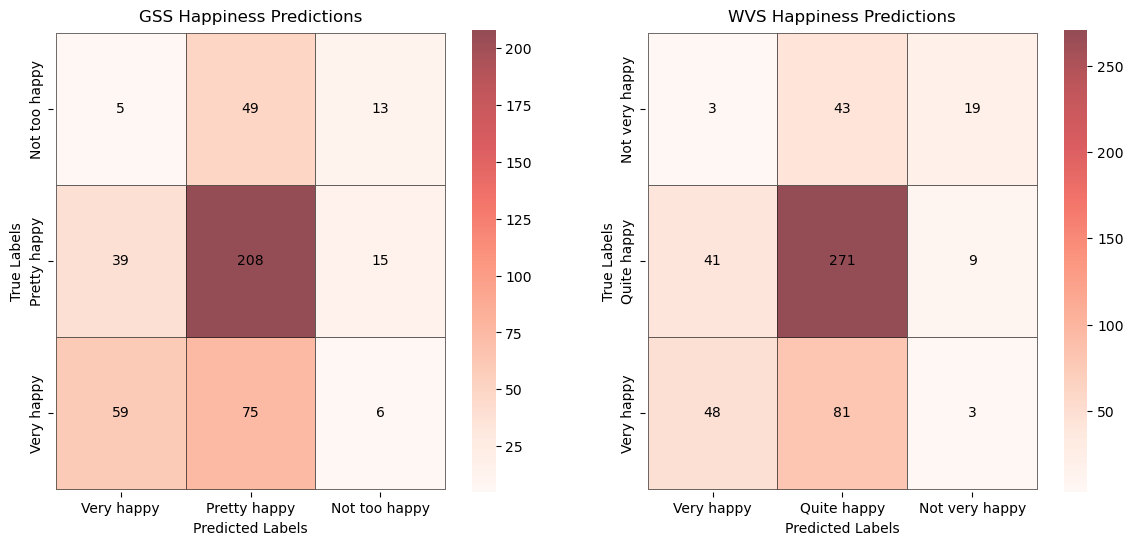

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for i, (model, X, y, label_dict, title) in enumerate([
    (gss_model_fit, X_test_gss, y_test_gss, gss_happy_code, "GSS Happiness Predictions"),
    (wvs_model_fit, X_test_wvs, y_test_wvs, wvs_happy_code, "WVS Happiness Predictions")
]):
    y_pred = model.predict(X)
    conf_mat = confusion_matrix(y, y_pred)
    
    sns.heatmap(
        conf_mat, 
        fmt="d",
        cmap="Reds",
        xticklabels=label_dict.values(),
        yticklabels=label_dict.values(),
        ax=axs[i],
        linewidths=0.5,
        linecolor="#333333",
        alpha=0.7
    )
    
    axs[i].set_title(title)
    axs[i].set_xlabel("Predicted Labels")
    axs[i].set_ylabel("True Labels")
    axs[i].set_xlim(-0.02, len(label_dict)+0.02)
    axs[i].set_ylim(-0.02, len(label_dict)+0.02)
    
    for j in range(conf_mat.shape[0]):
        for k in range(conf_mat.shape[1]):
            axs[i].text(
                k + 0.5,
                j + 0.5,
                conf_mat[j, k],
                ha="center",
                va="center",
                color="black"
            )

print("Figure 1: Confusion matrix of model predictions across both datasets\n")

plt.show()

## 4.2 Feature Importance



### 4.2.1 Feature Importance Tables

The tables below display the top 15 features by importance for the GSS and WVS datasets for predicting happiness, with the left table showing the highest feature importance using XGBoost's built-in feature importance and the right table showing the highest permutation importance, assessing features based on F1-score degradation.

**Key takeaways:**

* Feature Importance:
    * GSS: Political affiliation, living situation (with respect to number of children, marriage and cohabitation status, housing situation), working situation (fair treatment, work schedule, employment status, etc.), physical health status, religiousity and spirituality, social ability, race, and college major.
    * WVS: Location, working situation (employment status, occupational group), religiousity, political affiliation, physical health status, race and ethnicity, sense of security, sense of freedom.

* Permutation Importance:
    * GSS: Political affiliation, age, physical health status, religiousity, working situation, social ability, and social position.
    * WVS: Location, working situation, sense of trust and security in neighborhood, education level, race and ethnicity, sense of importance in family, and worries for future. 

* Overlapping features:
    * GSS: Political affiliation, religious preference, and social ability.
    * WVS: location, occupational group, race and ethnicity, employment sector.

In [66]:
# Top 15 of highest feature importance
def top_feature_importance(df, column_labels, n=15):
    # Top n of highest feature importance
    display_df = df.copy()
    display_df["Feature Label"] = display_df.index.map(column_labels).str.title().str.replace(" R ", " Respondent ").str.replace("R ", "Respondent ").str.replace("R'S", "Respondent's")
    display_df = display_df.map(lambda x: f"{100*x:.2f}%" if isinstance(x, (int, float)) else x)
    display_df = display_df.iloc[:n, [2, 0, 1]]
    return display_df

In [67]:
gss_pooled_display_df = top_feature_importance(gss_pooled_feature_importance_df, gss_column_labels)
wvs_pooled_display_df = top_feature_importance(wvs_pooled_feature_importance_df, wvs_column_labels)

In [68]:
# Top 15 of highest permutation importance
def top_perm_importance(df, column_labels, n=15):
    display_df = df.copy()
    display_df["Feature Label"] = display_df.index.map(column_labels).str.title().str.replace(" R ", " Respondent ").str.replace("R ", "Respondent ").str.replace("R'S", "Respondent's")
    display_df["Permutation Importance"] = display_df["Permutation Importance"].apply(lambda x: f"{x:.3f}")
    display_df["% F1-score Lowered"] = display_df["% F1-score Lowered"].apply(lambda x: f"{x:.2f}%")
    display_df = display_df.iloc[:n, [2, 0, 1]]
    return display_df

In [69]:
gss_perm_display_df = top_perm_importance(gss_perm_importance_df, gss_column_labels)
wvs_perm_display_df = top_perm_importance(wvs_perm_importance_df, wvs_column_labels)

In [70]:
from IPython.display import HTML

def html_feature_rankings(df1, df2):
    # Convert dataframes to HTML
    df1_html = df1.to_html()
    df2_html = df2.to_html()

    # Display
    html = "<div style='text-align: center;'><font size='4'><b></b></div><br>" \
           "<div style='display: flex; justify-content: center;'>" + \
           "<div>{}</div><div>&nbsp;&nbsp;&nbsp;</div><div>{}</div></div>".format(df1_html, df2_html)

    return HTML(html)

In [71]:
gss_display_html = html_feature_rankings(gss_pooled_display_df, gss_perm_display_df)
wvs_display_html = html_feature_rankings(wvs_pooled_display_df, wvs_perm_display_df)

In [72]:
# Show shared FI / PI
def show_shared_fi_pi(perm_df, pooled_df):
    perm_df["PI Rank"] = np.arange(1, len(perm_df) + 1)
    pooled_df["FI Rank"] = np.arange(1, len(pooled_df) + 1)
    intersect_df = pd.merge(perm_df, pooled_df.drop(columns=["Feature Label", "Cumulative Importance"]), left_on="Feature", right_on="Feature", how="inner")
    intersect_df.reset_index(inplace=True)
    intersect_df.sort_values(by=["FI Rank", "PI Rank"], inplace=True)
    intersect_df.set_index(["FI Rank", "PI Rank"], inplace=True)
    intersect_df.rename(columns={"Permutation Importance": "PI", "Feature Importance": "FI"}, inplace=True)
    return intersect_df

In [73]:
gss_intersect_display_df = show_shared_fi_pi(gss_perm_display_df, gss_pooled_display_df)
wvs_intersect_display_df = show_shared_fi_pi(wvs_perm_display_df, wvs_pooled_display_df)

In [74]:
print("Table 3: GSS Model Feature Rankings")
display(gss_display_html)

Table 3: GSS Model Feature Rankings


,Feature Label,Feature Importance,Cumulative Importance
Feature,,,
partyid,Political Party Affiliation,3.67%,3.67%
childs,Number Of Children,3.49%,7.16%
wrkstat,Labor Force Status,3.44%,10.60%
marcohab,Cohabitation Status,2.95%,13.54%
dwelling,Type Of Structure,1.96%,15.51%
relsprt,Is Respondent Spiritual Person,1.80%,17.30%
workfor1,Respondent Work For Whom,1.76%,19.06%
wrksched,Usual Work Schedule,1.75%,20.81%
major1,College Major 1,1.69%,22.50%


In [75]:
print("Table 4: WVS Model Feature Rankings")
display(wvs_display_html)

Table 4: WVS Model Feature Rankings


,Feature Label,Feature Importance,Cumulative Importance
Feature,,,
N_REGION_ISO,Region Iso 3166-2,7.40%,7.40%
Q279,Employment Status,3.96%,11.35%
Q281,Respondent - Occupational Group,3.89%,15.24%
Q273,Marital Status,3.64%,18.88%
Q289,Religious Denominations - Major Groups,3.15%,22.03%
Q223,Which Party Would You Vote For If There Were A National Election Tomorrow,3.05%,25.07%
Q47,State Of Health (Subjective),2.40%,27.47%
Q290,Racial Belonging/ Ethnic Group,2.38%,29.85%
Q272,Language At Home,2.23%,32.08%


In [76]:
print("Table 5: GSS Overlapping Model Features\n")
display(gss_intersect_display_df)

Table 5: GSS Overlapping Model Features



,,Feature,Feature Label,PI,% F1-score Lowered,FI
FI Rank,PI Rank,,,,,
1,11,partyid,Political Party Affiliation,-0.009,-1.86%,3.67%
12,2,relig,Respondent's Religious Preference,-0.021,-4.27%,1.16%
13,14,actssoc,How Well Respondent Carries Out Usual Social A...,-0.009,-1.81%,1.04%


In [77]:
print("Table 6: WVS Overlapping Model Features\n")
display(wvs_intersect_display_df)

Table 6: WVS Overlapping Model Features



,,Feature,Feature Label,PI,% F1-score Lowered,FI
FI Rank,PI Rank,,,,,
1,15,N_REGION_ISO,Region Iso 3166-2,-0.005,-1.03%,7.40%
3,5,Q281,Respondent - Occupational Group,-0.010,-1.81%,3.89%
8,7,Q290,Racial Belonging/ Ethnic Group,-0.009,-1.75%,2.38%
10,13,Q284,Sector Of Employment,-0.007,-1.25%,2.22%


### 4.2.2 Feature Importance Plots

Feature and permutation importance for the GSS and WVS datasets for predicting happiness plots are shown below.

**Key takeaways:**

* Cumulative feature importance rises sharper with WVS data, indicating higher concentration of importance.
* Cumulative feature importance rises slow across both datasets, indicating most features have a very small impact on the model.
* Feature importance goes to approximately zero in both datasets, indicating more further feature selection could be necessary.
* Permutation importance through percent change in baseline F1-score is relatively flat, indicating most features have a very small impact on the model. Both datasets contain a spike at the end of the plots, showing some features drastically hurt performance, indicating further feature selection could be necessary.

Figure 2: FI and PI across both datasets



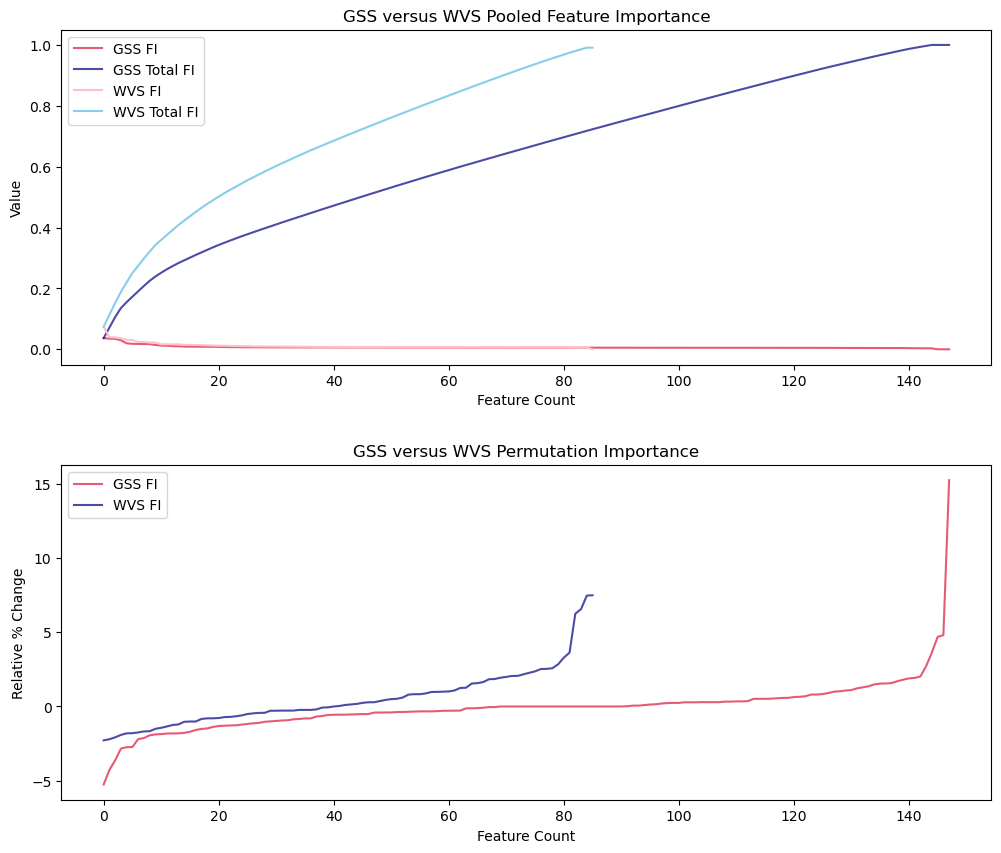

In [78]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(12, 10))

# Add space between plots
plt.subplots_adjust(hspace=0.3)

# Plot GSS FI
gss_fi_plot = gss_pooled_feature_importance_df.reset_index().plot(
    ax=axs[0], 
    kind="line",
    color=["crimson", "navy"],
    alpha=0.7
)

# Plot WVS FI
wvs_fi_plot = wvs_pooled_feature_importance_df.reset_index().plot(
    ax=axs[0], 
    kind="line",
    color=["pink", "skyblue"],
    alpha=1
)

fi_lines = gss_fi_plot.lines + wvs_fi_plot.lines
axs[0].legend(fi_lines, ["GSS FI", "GSS Total FI", "WVS FI", "WVS Total FI"])
axs[0].set_title("GSS versus WVS Pooled Feature Importance")
axs[0].set_xlabel("Feature Count")
axs[0].set_ylabel("Value")

# Plot GSS PI
gss_pi_plot = gss_perm_importance_df["% F1-score Lowered"].reset_index().plot(
    ax=axs[1], 
    kind="line",
    color="crimson",
    alpha=0.7
)

# Plot WVS PI
wvs_pi_plot = wvs_perm_importance_df["% F1-score Lowered"].reset_index().plot(
    ax=axs[1], 
    kind="line",
    color="navy",
    alpha=0.7
)

pi_lines = gss_pi_plot.lines + wvs_pi_plot.lines

axs[1].legend(pi_lines, ["GSS FI", "WVS FI"])
axs[1].set_title("GSS versus WVS Permutation Importance")
axs[1].set_xlabel("Feature Count")
axs[1].set_ylabel("Relative % Change")

print("Figure 2: FI and PI across both datasets\n")

plt.show()

# V. Discussion

## 5.1 Findings and Implications

### 5.1.1 Summary of Key Findings

Briefly summarize the main results of your study, highlighting the most important discoveries.  

### 5.1.2 Implications and Potential Applications

Discuss the implications of your findings in the context of your original objective.  
Explain how your results could be applied in real-world scenarios or future research.  
Highlight any potential benefits, challenges, or limitations of implementing your findings.

Understanding different predictors for happiness has implications across various levels:

* **Personal**: to guide what one could do specifically in their own lives to increase their own happiness, such as goal-setting and habit-forming.  
* **Policy**: to provide data-driven decision-making to policy decisions that can increase our happiness or to evaluate existing programs' effectiveness.
* **Economic**: to optimize resource allocation and develop business practices and regulations promoting happiness for the workforce and general public.
* **Cultural**: to cultivate communities focused on influencing collective increased happiness.

## 5.2 Limitations and Future Directions

### 5.2.1 Limitations of the Study

There are numerous limitations of this study:

* Limitations of your study, including any methodological constraints, data limitations, or potential biases.  

These limitations may have impacted the results of this study by:

*

### 5.2.2 Avenues for Future Research

Suggest potential avenues for future research, building on your findings and addressing the limitations of your study.  
Discuss how future research could expand on your results, explore new areas of inquiry, or address emerging questions and challenges

Future research could be informed using this research in several ways:

* **Longitudinal studies**: going past this research's findings to analyze predictors for happiness change over time.
* **Cross-cultural analysis**: building upon this research to explore differences in predictors for happiness across different cultural contexts.
* **Contextual analysis**: exploring differences in predictors for happiness not pertaining to culture or time, such as geographical or technological factors.
* **Causal inference**: employing experimental designs to attempt to establish causal relationships between predictors and happiness.


## VI. References

* Davern, Michael; Bautista, Rene; Freese, Jeremy; Herd, Pamela; and Morgan, Stephen L.; General Social Survey 1972-2024. [Machine-readable data file]. Principal Investigator, Michael Davern; Co-Principal Investigators, Rene Bautista, Jeremy Freese, Pamela Herd, and Stephen L. Morgan. Sponsored by National Science Foundation. NORC ed. Chicago: NORC, 2024: NORC at the University of Chicago [producer and distributor]. Data accessed from the GSS Data Explorer website at  gssdataexplorer.norc.org.
* Haerpfer, C., Inglehart, R., Moreno, A., Welzel, C., Kizilova, K., Diez-Medrano J., M. Lagos, P. Norris, E. Ponarin & B. Puranen (eds.). 2022. World Values Survey: Round Seven - Country-Pooled Datafile Version 5.0. Madrid, Spain & Vienna, Austria: JD Systems Institute & WVSA Secretariat. doi:10.14281/18241.24